<a href="https://colab.research.google.com/github/clairemurphy288/Diabetes-Prediction-/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
The motivation behind this project is to recreate and contribute to the results of the research paper "Application of Machine Learning Models for Early Detection and Accurate Classification of Type 2 Diabetes" by the Technical University of Peru. The primary focus is to streamline their results while exploring improved methodologies and algorithms specifically tailored to the problem of diabetes detection. In this replication, particular attention is placed on reducing false negatives, as this metric holds significant importance in the context of medical diagnostics. False negatives—cases where individuals with diabetes are misclassified as non-diabetic—can lead to missed diagnoses, delaying critical interventions and increasing the risk of severe complications such as cardiovascular disease, kidney failure, and blindness. By prioritizing recall (sensitivity) over overall accuracy, the project aims to ensure that more diabetic cases are identified, even if it slightly increases the number of false positives.


Research Paper that I'm recreating
https://pmc.ncbi.nlm.nih.gov/articles/PMC10378239/

Dataset: https://www.kaggle.com/datasets/mathchi/diabetes-data-set

# Handling Missing Values

To address the missing values, I replaced them with the median for each corresponding column. There are many missing values specifically in insulin, which seems to be a very important data point for classifying type 2 diabetes.




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
diabetes_df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv')

In [ ]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [ ]:
# These are the number of missing values for each datapoint.
zero_counts = (diabetes_df == 0).sum()
print(zero_counts)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
 # Total number of datapoints is 768: fairly small
 diabetes_df.shape

(768, 9)

In [ ]:
# prompt: remove zeroes in all colums except outcome and pregnancies

# Replace zero values with NaN in specific columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_to_replace] = diabetes_df[columns_to_replace].replace(0, np.nan)


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


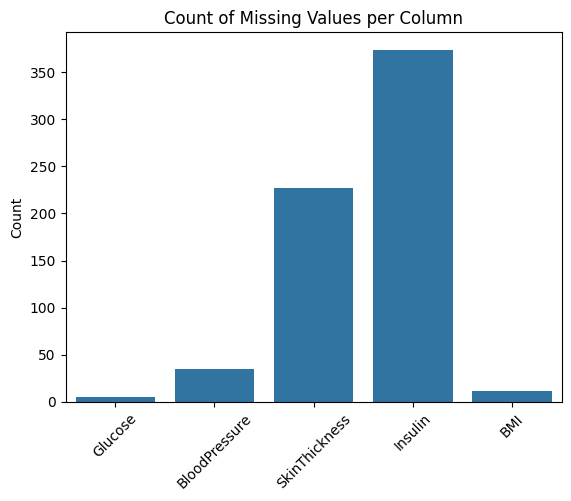

In [ ]:
# Here we can visulize the amount of missing values per feature to see where our dataset might be lacking
missing_counts = diabetes_df[columns_to_replace].isna().sum()
sns.barplot(x=missing_counts.index, y=missing_counts.values)
plt.xticks(rotation=45)
plt.title("Count of Missing Values per Column")
plt.ylabel("Count")
plt.xlabel("")
plt.show()


In [ ]:
# replace N/A with median

diabetes_df[columns_to_replace] = diabetes_df[columns_to_replace].fillna(diabetes_df[columns_to_replace].median())

**Handling Missing Values**

To handle the missing values, I replaced them with the median for each coresponding column. There are a lot of missing values speciifically in insulin which seems like a very important data point for classifying type 2 diabetes. I will explore better methods than this to improve my outcome.

#Finding Outliers

I chose not to remove outliers from this dataset because I believed it was important to keep them in order for the model to diagnose patients who fall outside the norm or are difficult to detect.

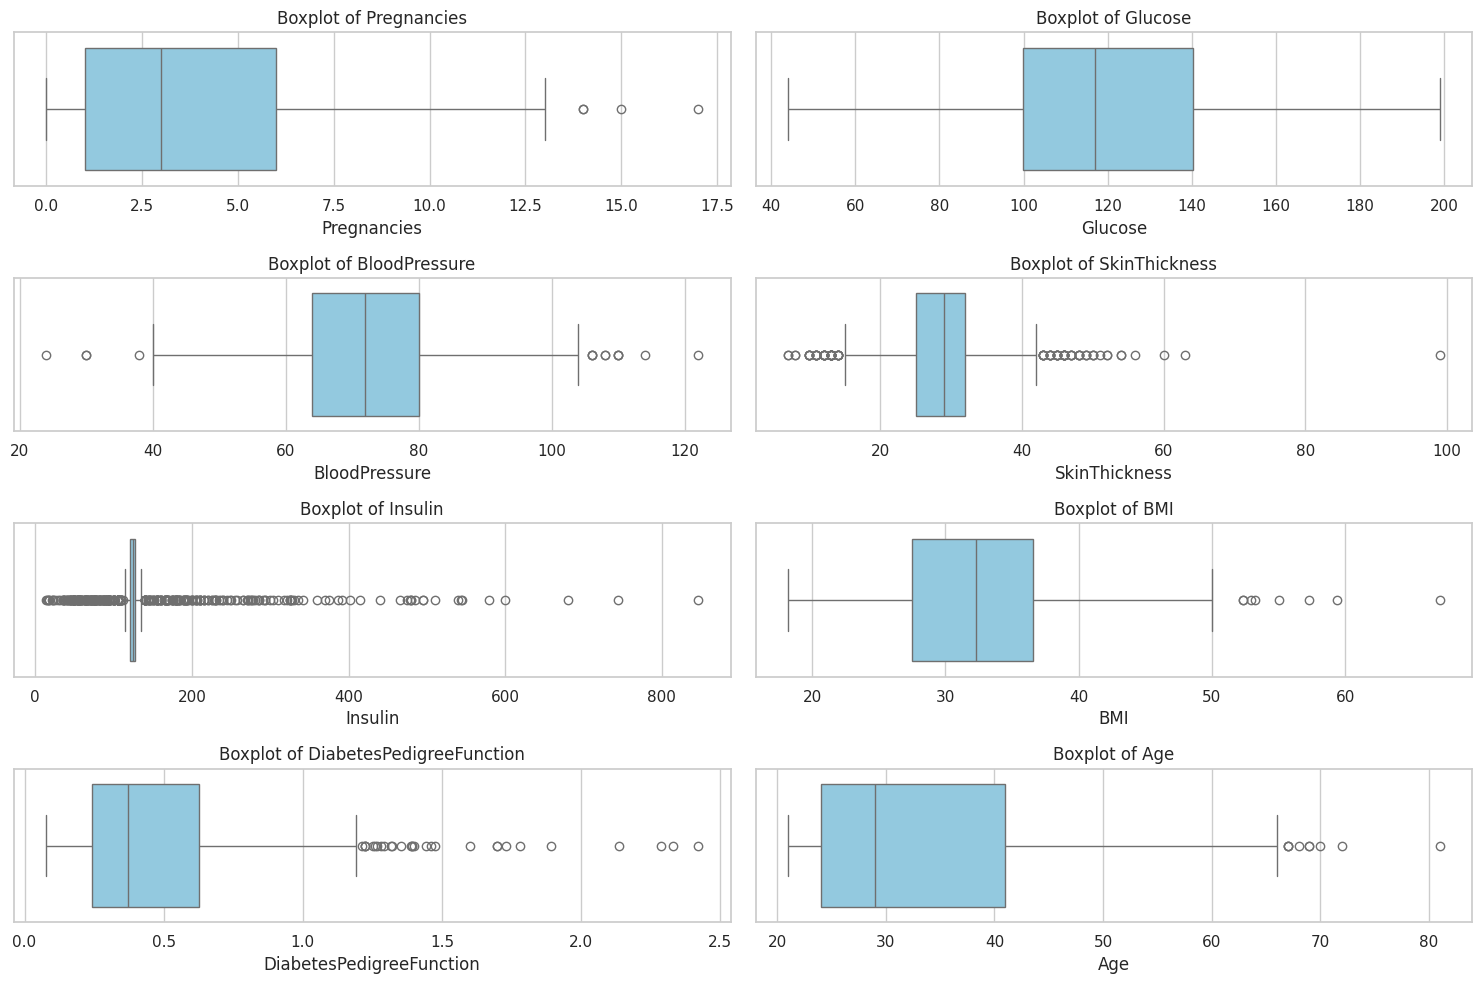

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set Seaborn style for better visualization
sns.set(style="whitegrid")

# List of numerical columns
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create boxplots for all numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 2, i)  # Arrange subplots in a grid (4 rows, 2 columns)
    sns.boxplot(data=diabetes_df[col], orient='h', color="skyblue")
    plt.title(f"Boxplot of {col}")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()




# Find Distribution of Dataset

Here I wanted to do some data analysis using seaborn to see the correlation of the values. I was able to observe a distinct positive correlation between Glucose and BMI as well as Glucose and Insulin.

In [ ]:
diabetes_df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


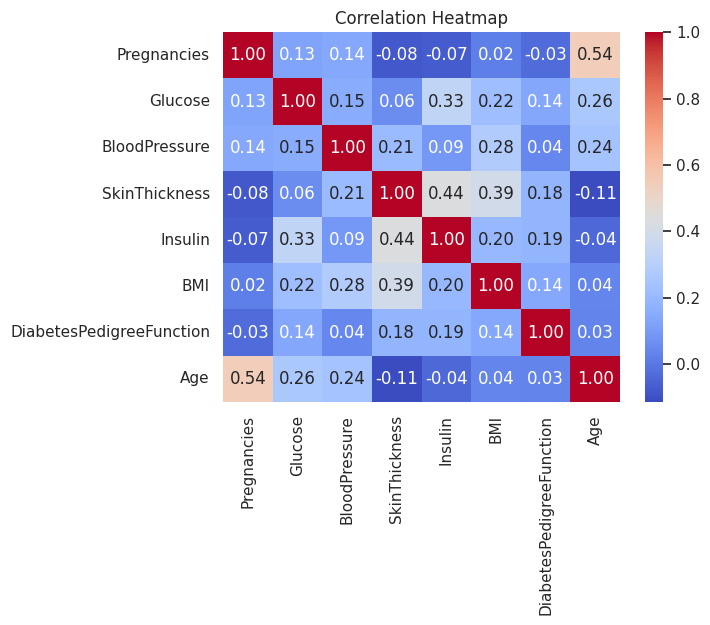

In [ ]:
correlation = X.corr()
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

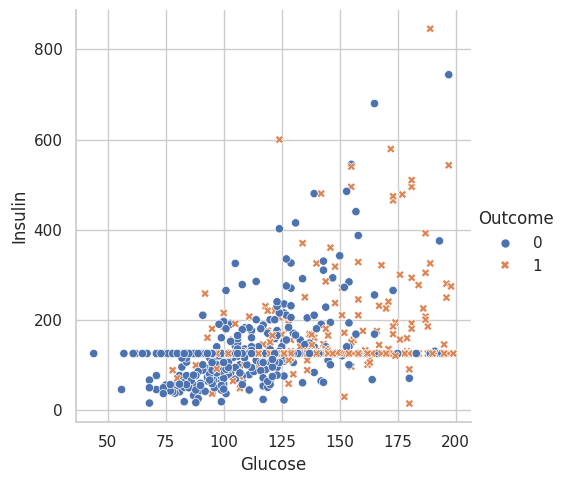

In [ ]:
sns.relplot(data=diabetes_df, x='Glucose', y='Insulin', hue='Outcome', style='Outcome')

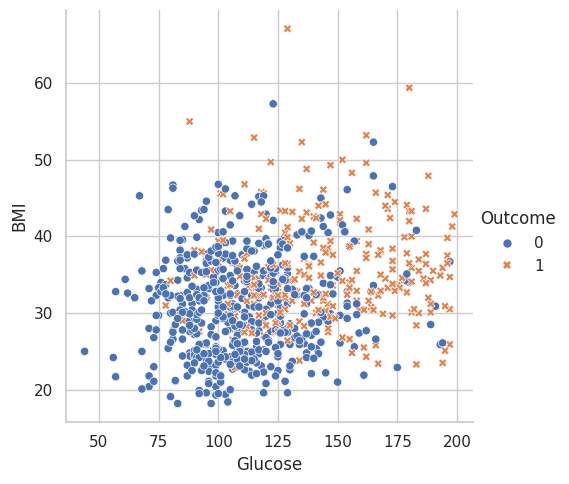

In [ ]:
sns.relplot(data=diabetes_df, x='Glucose', y='BMI', hue='Outcome', style='Outcome')

# Handling Imbalanced Dataset

The dataset is imbalanced becaused there are a lot more non-diabetic as compared to diabetic data points. In order to improve the performance of the models, I decided to explore more methods for handling imbalanced data. The paper already used SMOTE to oversample the data and create more simulated data-points. I also wanted to explore undersampling using cluster centroids as undersampling could lower the overall accuracy of the model, but improve recall which is our focus within the healthcare space.



In [37]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Applying SMOTE
smote = SMOTE()
X_sm, Y_sm = smote.fit_resample(X, y)


cc = ClusterCentroids()
X_cc, Y_cc = cc.fit_resample(X, y)

print(Y_cc.value_counts())






Outcome
0    268
1    268
Name: count, dtype: int64


In [ ]:
# Standardize the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)

X = standardized_data
Y = diabetes_df['Outcome']


scaler_sm = StandardScaler()
scaler_sm.fit(X_sm)
standardized_data_smote = scaler_sm.transform(X_sm)
X_sm = standardized_data_smote

scaler_cc = StandardScaler()
scaler_cc.fit(X_cc)
standardized_data_cc = scaler_cc.transform(X_cc)
X_cc = standardized_data_cc





# Models Used in the paper

K-nearest neighbor (K-NN), Bernoulli Naïve Bayes (BNB), decision tree (DT), logistic regression (LR), and support vector machine (SVM)

I created a confusion matrix and a table with accuracy, recall, and precision to analyze the results.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, test_size=0.2, random_state=4)

X_train_smote, X_test_smote, Y_train_smote, Y_test_smote = train_test_split(X_sm, Y_sm, stratify = Y_sm, test_size=0.2, random_state=4)

X_train_cc, X_test_cc, Y_train_cc, Y_test_cc = train_test_split(X_cc, Y_cc, stratify = Y_cc, test_size=0.2, random_state=4)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": BernoulliNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Classifier": SVC()
}

# Define datasets
datasets = {
    "Original": (X_train, X_test, Y_train, Y_test),
    "SMOTE": (X_train_smote, X_test_smote, Y_train_smote, Y_test_smote),
    "CC": (X_train_cc, X_test_cc, Y_train_cc, Y_test_cc)
}



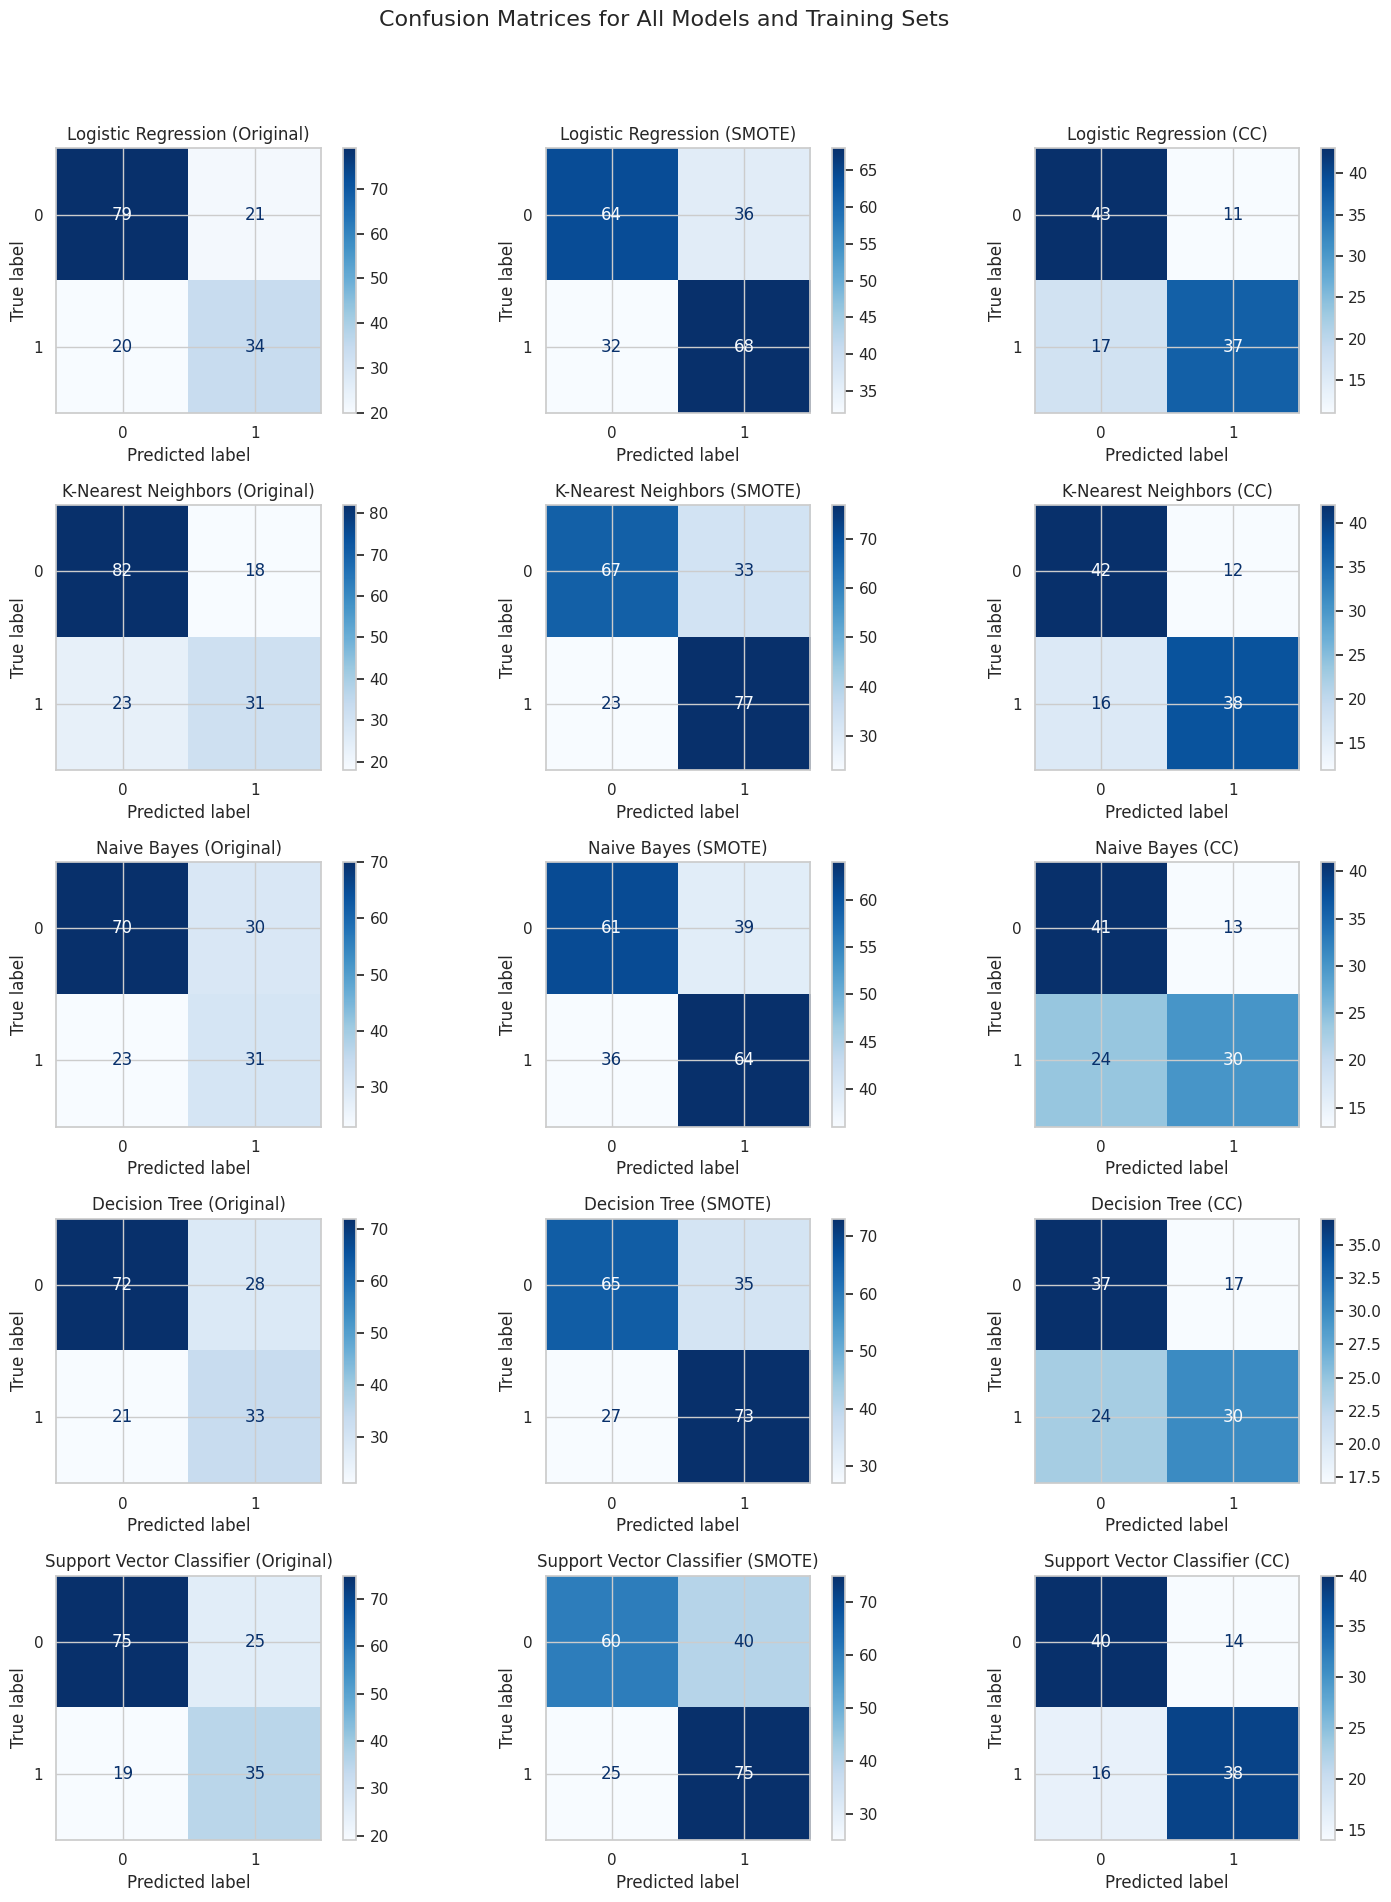

In [ ]:

results = []

# Create subplots for confusion matrices
fig, axes = plt.subplots(len(models), len(datasets), figsize=(15, 20))
fig.suptitle("Confusion Matrices for All Models and Training Sets", fontsize=16)

# Iterate through datasets and models
for col, (dataset_name, (X_train, X_test, Y_train, Y_test)) in enumerate(datasets.items()):
    for row, (model_name, model) in enumerate(models.items()):
        # Train the model
        model.fit(X_train, Y_train)
        # Predict
        y_pred = model.predict(X_test)
        # Metrics
        accuracy = accuracy_score(Y_test, y_pred)
        precision = precision_score(Y_test, y_pred)
        recall = recall_score(Y_test, y_pred)
        # Store results
        results.append({
            "Model": model_name,
            "Dataset": dataset_name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
        })
        # Confusion matrix
        cm = confusion_matrix(Y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(ax=axes[row, col], cmap='Blues', values_format='d')
        axes[row, col].set_title(f"{model_name} ({dataset_name})")

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
# Display the results as a table
results_df = pd.DataFrame(results)
results_df


,Model,Dataset,Accuracy,Precision,Recall
0,Logistic Regression,Original,0.733766,0.618182,0.629630
1,K-Nearest Neighbors,Original,0.733766,0.632653,0.574074
2,Naive Bayes,Original,0.655844,0.508197,0.574074
3,Decision Tree,Original,0.681818,0.540984,0.611111
4,Support Vector Classifier,Original,0.714286,0.583333,0.648148
5,Logistic Regression,SMOTE,0.660000,0.653846,0.680000
6,K-Nearest Neighbors,SMOTE,0.720000,0.700000,0.770000
7,Naive Bayes,SMOTE,0.625000,0.621359,0.640000
8,Decision Tree,SMOTE,0.690000,0.675926,0.730000
9,Support Vector Classifier,SMOTE,0.675000,0.652174,0.750000


# Conclusion

The models that performed the best by metrics were K-Nearest Neighbors (K-NN) with SMOTE and Support Vector Classifier (SVC) with under-sampling. The success of these models highlights the importance of addressing class imbalance, as SMOTE and under-sampling techniques helped improve recall and overall performance. Minimizing false negatives is particularly critical in the context of diabetes detection, as failing to identify a diabetic individual can lead to serious health consequences. These results emphasize the need for thoughtful preprocessing and model selection when dealing with imbalanced datasets in medical applications."